## 학습목표
- 멜론차트 top 100에 있는 노래제목과 가수 이름 수집!
- 다양한 환경에 있는 태그정보를 선택해서 추출!

In [1]:
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd

In [10]:
url = "https://www.melon.com/chart/"
req.get(url)

<Response [406]>

- 멜론페이지에서 접근을 막음 > 웹페이지의 개발자 도구의 "network"의 documnet type 에서 headers


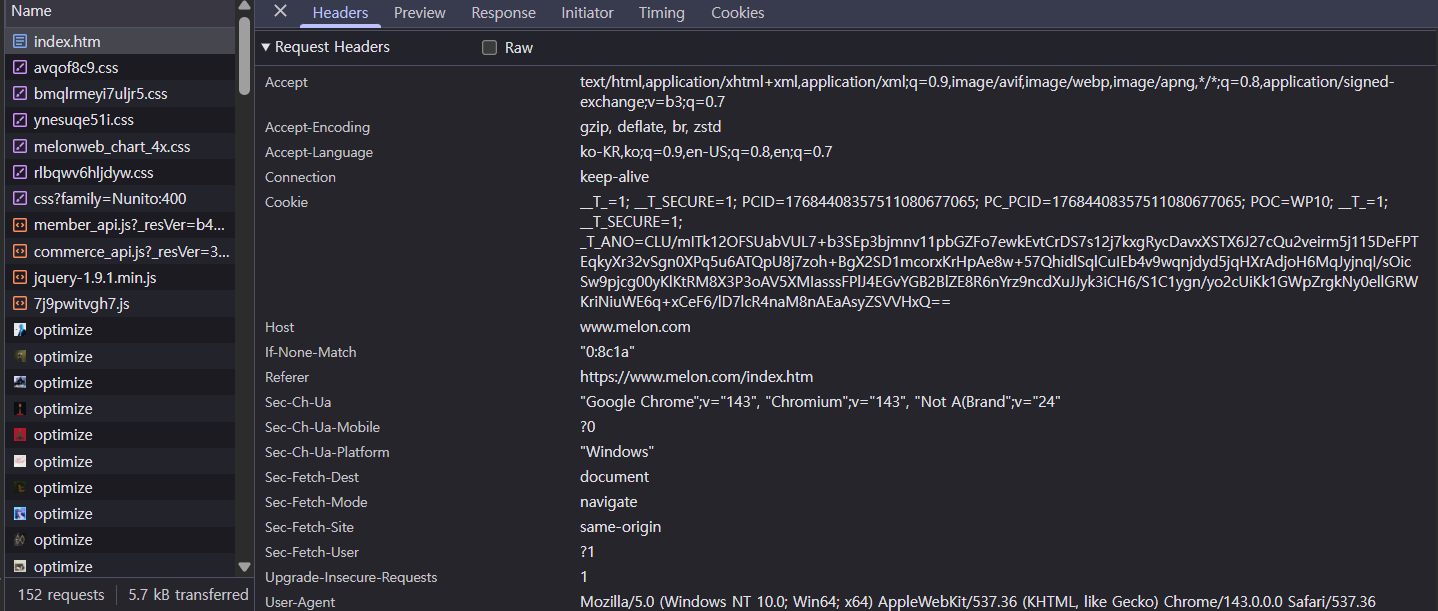


> 가장 밑의 `user-agent : 
Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/143.0.0.0 Safari/537.36`

In [11]:
h = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/143.0.0.0 Safari/537.36'}

In [15]:
url = "https://www.melon.com/chart/"
res = req.get(url,headers = h) # header 속성에 브라우저정보를 포함시켜 요청

In [17]:
soup = bs(res.text,'lxml')
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="4022717807957185" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" property="og:si

### 데이터 수집
- 노래제목
- 가수

In [28]:
title = soup.select("div.ellipsis.rank01>span>a")

In [41]:
singer = soup.select("div.ellipsis.rank02")

In [48]:
singer[0].text #가수명이 이름이 2개씩 나옴

'\n화사 (HWASA)화사 (HWASA)\n'

In [42]:
len(title),len(singer)

(100, 100)

- 가수 수집

In [49]:
soup.select("div.ellipsis.rank02>a")[0].text# 가수명은 잘 나오지만, 개수가 맞지 않음

'화사 (HWASA)'

In [54]:
len(soup.select("div.wrap div.ellipsis.rank02")) 

123

In [56]:
soup.select("div.ellipsis.rank02>span.checkEllipsis") # div 내에 span 태그만 가져오면 중복되서 가져오지 않음!

[<span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('756531');" title="화사 (HWASA) - 페이지 이동">화사 (HWASA)</a></span>,
 <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3080810');" title="한로로 - 페이지 이동">한로로</a></span>,
 <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('2086047');" title="WOODZ - 페이지 이동">WOODZ</a></span>,
 <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('236815');" title="다비치 - 페이지 이동">다비치</a></span>,
 <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('3070786');" title="NMIXX - 페이지 이동">NMIXX</a></span>,
 <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('735506');" title="카더가든 - 페이지 이동">카더가든</a></span>,
 <span class="checkEllipsis" style="display:none"><a href="javascript:melon.link.goArtistDetail('434838

In [58]:
len(soup.select("div.ellipsis.rank02>span.checkEllipsis"))

100

In [59]:
singer = soup.select("div.ellipsis.rank02>span.checkEllipsis")
singer[1].text

'한로로'

In [60]:
music_list = []
for i in range(100):
    t = title[i].text
    s = singer[i].text
    music_list.append([t,s])

In [70]:
top100 = pd.DataFrame(music_list,columns=['제목','가수'],index=pd.Index(range(1,101),name = "순위"))

In [71]:
top100

,제목,가수
순위,,
1,Good Goodbye,화사 (HWASA)
2,사랑하게 될 거야,한로로
3,Drowning,WOODZ
4,타임캡슐,다비치
5,Blue Valentine,NMIXX
...,...,...
96,고민중독,QWER
97,BBUU!,PLAVE
98,비가 와서,임영웅
